# 1. **Data collection through web scraping**

In [ ]:
import pandas as pd
df1=pd.read_csv('/content/amazon01.csv')

In [ ]:
df1.head()

,UserId,ProductId,ProductType,Rating,Timestamp,URL
0,A3NHUQ33CFH3VM,B00LLPT4HI,Eyeliner & Kajal,5,1405814400,https://www.amazon.in/Maybelline-Colossal-Kaja...
1,A63A35RBSL9IN,B00LCEROA2,Eyeliner & Kajal,5,1404345600,https://www.amazon.in/Maybelline-York-Colossal...
2,A2QN4RBWX6V5PD,B00LAOMUUS,Eyeliner & Kajal,5,1405123200,https://www.amazon.in/Elle-18-Drama-Kajal-Blac...
3,A2F1GOVSCF486L,B00L6Q3BH6,Eyeliner & Kajal,5,1405814400,https://www.amazon.in/Lakme-Eyeconic-Insta-Kaj...
4,AHW91H3EJ8A70,B00L5JHZJO,Eyeliner & Kajal,5,1403395200,https://www.amazon.in/Faces-Magnet-Eyes-Kajal-...


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

def get_data(url):
    try:
        r = requests.get(url, headers=HEADERS, timeout=10)
        r.raise_for_status()
        return r.text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

def html_code(url):
    html_data = get_data(url)
    if html_data:
        soup = BeautifulSoup(html_data, 'html.parser')
        return soup
    else:
        return None


In [ ]:

df = pd.DataFrame(columns=["Product Name", "Ratings", "Review"])
urls = df1['URL'].tolist()
for url in urls[:2000]:
    soup = html_code(url)
    if soup is None:
        print(f"Skipping {url} due to error in fetching HTML")
        continue
    try:
        product_name = soup.find("span", {"id": 'productTitle'}).get_text(strip=True)
    except Exception as e:
        print(f"Error extracting product info from {url}: {e}")
        continue
    reviews = soup.find_all("span", {"data-hook": 'review-body'})
    ratings = soup.find_all("i", {"data-hook": 'review-star-rating'})
    for review, rating in zip(reviews, ratings):
        rating_text = rating.find("span", {"class": 'a-icon-alt'}).get_text(strip=True)
        review_text=review.find("div",{"data-hook": "review-collapsed"}).get_text(strip=True)
        df = df.append({"Product Name": product_name, "Ratings": rating_text, "Review": review_text}, ignore_index=True)



Error fetching https://www.amazon.in/Maybelline-Colossal-Kajal-Black-0-35g/dp/B06WGZP21B/ref=lp_27061952031_1_1?sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D: 503 Server Error: Service Unavailable for url: https://www.amazon.in/Maybelline-Colossal-Kajal-Black-0-35g/dp/B06WGZP21B/ref=lp_27061952031_1_1?sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D
Skipping https://www.amazon.in/Maybelline-Colossal-Kajal-Black-0-35g/dp/B06WGZP21B/ref=lp_27061952031_1_1?sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D due to error in fetching HTML
Error extracting product info from https://www.amazon.in/Maybelline-York-Colossal-Eyeliner-Black/dp/B07S141T2R/ref=lp_27061952031_1_2?sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D: 'NoneType' object has no attribute 'get_text'
Error fetching https://www.amazon.in/Elle-18-Drama-Kajal-Black/dp/B01LNT83KK/ref=lp_27061952031_1_3?sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D: 503 Server Error: Service Unavailable for url: https://www.amazon.in/Elle-18-Drama-Kajal-Black/dp/B01LNT83KK/ref=lp_27061952031_1_

In [ ]:
df.head(10)

,Product Name,Ratings,Review
0,Yardley London Morning Dew Perfumed Talc for W...,5.0 out of 5 stars,Good talcum powder
1,Yardley London Morning Dew Perfumed Talc for W...,4.0 out of 5 stars,Fresh and sweet fragrance. I liked it
2,Yardley London Morning Dew Perfumed Talc for W...,5.0 out of 5 stars,Super hai bhai
3,Yardley London Morning Dew Perfumed Talc for W...,5.0 out of 5 stars,Nice product
4,Yardley London Morning Dew Perfumed Talc for W...,5.0 out of 5 stars,I have been ordering this for ages now; a fave...
5,Yardley London Morning Dew Perfumed Talc for W...,4.0 out of 5 stars,Great smell
6,Yardley London Morning Dew Perfumed Talc for W...,3.0 out of 5 stars,I recieved only talc not deo
7,Yardley London Morning Dew Perfumed Talc for W...,5.0 out of 5 stars,"This one is nice perfume powder, but as per me..."
8,Enchanteur Romantic Perfumed Talcum Powder wit...,5.0 out of 5 stars,Excellent product I like smell and quality 👌...
9,Enchanteur Romantic Perfumed Talcum Powder wit...,4.0 out of 5 stars,It really held upto its title of perfumed powd...


In [ ]:
df.to_excel('dataset2.xlsx')

In [ ]:
import pandas as pd

In [ ]:
df15=pd.read_csv("/content/reviews_1250-end.csv")

In [ ]:
import pandas as pd

df1 = pd.read_excel('/content/review_datset.xlsx')
df1.drop('Unnamed: 0',axis=1,inplace= True)
df1.shape
df2 = pd.read_excel('/content/dataset2.xlsx')
df2.drop('Unnamed: 0',axis=1,inplace= True)
df2.shape


In [ ]:
df3=df2[['product_name','rating','review_text']]
df3.shape

In [ ]:
df3.to_excel('dataset2.xlsx')

In [ ]:
import pandas as pd
merged_df = pd.concat([df1, df2], ignore_index=True)

merged_df.to_excel('train_datset.xlsx', index=False)

In [ ]:
# Create an empty list to store the extracted values
extracted = []
# Loop through each rating in the list
for rating in df1['Ratings']:
    #Split the rating by space and take the first element
    num = rating.split()[0]
    #Convert the string to a float and append it to the extracted list
    extracted.append(float(num))
# Print the extracted list
print(extracted)


In [ ]:
df1['Rating']=extracted
df1['Rating']=df1['Rating'].astype(int)

In [ ]:
df1 = df1.drop('Ratings', axis=1)
df1.head(10)

In [ ]:
# Define new column names
new_column_names = ['Product Name', 'Rating', 'Review']  # Define your new column names here

# Assign new column names to the DataFrame
df3.columns = new_column_names


In [ ]:
import pandas as pd
subset_size = 1500
subset = df1.sample(n=subset_size, random_state=42)
df1 = df1.drop(subset.index)



In [ ]:
import pandas as pd
subset_size = 100
subset = df2.sample(n=subset_size, random_state=42)
df2= df2.drop(subset.index)



In [ ]:
subset.shape
subset.to_excel('testing.xlsx')

# 2. Data Cleaning

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
data=pd.read_excel('/content/train_datset.xlsx')
print(data.head())
print(data.shape)

                                        Product Name  \
0  Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
1  Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
2  Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
3  Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
4  Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   

                                              Review  Rating  
0  Mild fragrance, authentic ayurvedic product. N...       5  
1  Very good product. Look of bottle is really am...       4  
2  Ordered Kapiva hair oil . It’s pure natural to...       5  
3                                                NaN       3  
4  Fragrance is also a good, i think other can tr...       5  
(24972, 3)


In [ ]:
data.head(10)

,Product Name,Review,Rating
0,Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...,"Mild fragrance, authentic ayurvedic product. N...",5
1,Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...,Very good product. Look of bottle is really am...,4
2,Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...,Ordered Kapiva hair oil . It’s pure natural to...,5
3,Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...,NaN,3
4,Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...,"Fragrance is also a good, i think other can tr...",5
5,Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...,Plz Don't buy the product it's not reducing th...,1
6,Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...,Its a good product. Gave my hair nice lustre f...,4
7,Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...,I have been using it for 2 weeks now. I can cl...,5
8,"St.Botanica Pure Neroli Pure Essential Oil, 15...","The scent is pure earthy and ""khus"" as committ...",5
9,"St.Botanica Pure Neroli Pure Essential Oil, 15...",Mild and pleasant fragrance .,4


In [ ]:
data.isna().sum()

Product Name     0
Review          80
Rating           0
dtype: int64

In [ ]:
data.duplicated().sum()

3278

In [ ]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of                                             Product Name  \
0      Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
1      Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
2      Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
3      Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
4      Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
...                                                  ...   
24967                                     Plump Pout Duo   
24968                         25 Years of Dr. Brandt Kit   
24969  Multi Action Clear Acne Clearing Treatment Lot...   
24970  Multi Action Clear Acne Clearing Treatment Lot...   
24971  Multi Action Clear Acne Clearing Treatment Lot...   

                                                  Review  Rating  
0      Mild fragrance, authentic ayurvedic product. N...       5  
1      Very good product. Look of bottle is really am...       4  
2      Ordered Kapiva hair oil . It’s pure natural to...       5  
3                                                    NaN       3  
4      Fragrance is also a good, i think other can tr...       5  
...                                                  ...     ...  
24967  Two for one is definitely a good deal consider...       3  
24968  strongly disappointed with this kit. products ...       1  
24969  First time trying Strivectin and I’m pleasantl...       4  
24970  This is great for acne prone/ oily skins. My a...       4  
24971  After using this product regularly, I noticed ...       4  

[24972 rows x 3 columns]>

In [ ]:
data=data.dropna()

In [ ]:
data.columns

Index(['Product Name', 'Review', 'Rating'], dtype='object')

In [ ]:
data.dtypes

Product Name    object
Review          object
Rating           int64
dtype: object

In [ ]:
data.shape

(24892, 3)

In [ ]:
def remove_emojis(text):
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F700-\U0001F77F"  # alchemical symbols
                                   u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                                   u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                                   u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                   u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                                   u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                                   u"\U00002702-\U000027B0"  # Dingbats
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

data['Review'] = remove_emojis(data['Review'])
print(data['Review'])


0        Mild fragrance, authentic ayurvedic product. N...
1        Very good product. Look of bottle is really am...
2        Ordered Kapiva hair oil . It’s pure natural to...
4        Fragrance is also a good, i think other can tr...
5        Plz Don't buy the product it's not reducing th...
                               ...                        
24967    Two for one is definitely a good deal consider...
24968    strongly disappointed with this kit. products ...
24969    First time trying Strivectin and I’m pleasantl...
24970    This is great for acne prone/ oily skins. My a...
24971    After using this product regularly, I noticed ...
Name: Review, Length: 24892, dtype: object


In [ ]:
# converting all text to lower case in the Phrase column
data['Review'] = data['Review'].apply(str.lower)
print(data)
#remove white space
data['Review'] = data['Review'].apply(lambda x: re.sub(r'\s+', ' ', x))
#remove non alphabetic words
data['Review'] = data['Review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '',x))
# using regex to remove punctuation
data['Review'] = data['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
#remove digits
data['Review'] = data['Review'].apply(lambda x: re.sub(r'\d+', '', x))
# Remove links from the 'Review' column
data['Review'] = data['Review'].apply(lambda x: re.sub(r'http\S+', '', x))
# Remove HTML tags from the 'Review' column
data['Review'] = data['Review'].apply(lambda x: re.sub(r'<[^>]+>', '', x))


                                            Product Name  \
0      Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
1      Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
2      Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
4      Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
5      Kapiva Tulsi Anti-Hair Fall Oil for Unisex Adu...   
...                                                  ...   
24967                                     Plump Pout Duo   
24968                         25 Years of Dr. Brandt Kit   
24969  Multi Action Clear Acne Clearing Treatment Lot...   
24970  Multi Action Clear Acne Clearing Treatment Lot...   
24971  Multi Action Clear Acne Clearing Treatment Lot...   

                                                  Review  Rating  
0      mild fragrance, authentic ayurvedic product. n...       5  
1      very good product. look of bottle is really am...       4  
2      ordered kapiva hair oil . it’s pure natural to...       5  
4      frag

In [ ]:
data['Product Name'] = data['Product Name'].apply(str.lower)

In [ ]:
print(data)

                                            Product Name  \
0      kapiva tulsi anti-hair fall oil for unisex adu...   
1      kapiva tulsi anti-hair fall oil for unisex adu...   
2      kapiva tulsi anti-hair fall oil for unisex adu...   
4      kapiva tulsi anti-hair fall oil for unisex adu...   
5      kapiva tulsi anti-hair fall oil for unisex adu...   
...                                                  ...   
24967                                     plump pout duo   
24968                         25 years of dr. brandt kit   
24969  multi action clear acne clearing treatment lot...   
24970  multi action clear acne clearing treatment lot...   
24971  multi action clear acne clearing treatment lot...   

                                                  Review  Rating  
0      mild fragrance authentic ayurvedic product non...       5  
1      very good product look of bottle is really ama...       4  
2      ordered kapiva hair oil  its pure natural toxi...       5  
4      frag

In [ ]:

chat_words_str = """
ASAP=As Soon As Possible
BTW=By The Way
B4=Before
FAQ=Frequently Asked Questions
FYI=For Your Information
GR8=Great
IMHO=In My Honest Opinion
IMO=In My Opinion
IOW=In Other Words
LOL=Laughing Out Loud
L8R=Later
M8=Mate
OIC=Oh I See
THX=Thank You
ty=Thank you
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
W8=Wait
7K=Sick:-D Laugher
u=You
n=And
gud=Good
nyc=Nice
prdct=product
plz=Please
pls=Please
ryt=right
idk=i dont know
ive=i have"""
# Function to convert chat words in a text
chat_words_map_dict = {line.split("=")[0].upper(): line.split("=")[1]
                       for line in chat_words_str.split("\n") if line}
def chat_words_conversion(text):
    return " ".join(chat_words_map_dict.get(w.upper(), w) for w in text.split())
data['Review'] = data['Review'].apply(chat_words_conversion)

In [ ]:
# Function to convert chat words in a text
chat_words_map_dict = {line.split("=")[0].upper(): line.split("=")[1]
                       for line in chat_words_str.split("\n") if line}

def chat_words_conversion(text):
    return " ".join(chat_words_map_dict.get(w.upper(), w) for w in text.split())
data['Review'] = data['Review'].apply(chat_words_conversion)


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a text
def remove_stopwords(text):
    # Split text into words
    words = text.split()
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

data['Review'] = data['Review'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

sentiment_category = []
for score in data['Rating']:
    if score >= 4:
        sentiment_category.append('Positive')
    elif 3 <= score < 4:
        sentiment_category.append('Neutral')
    elif 0 <= score < 3:
        sentiment_category.append('Negative')
    else:
        sentiment_category.append('NA')

data['Sentiment'] = sentiment_category

print(data)


                                            Product Name  \
0      kapiva tulsi anti-hair fall oil for unisex adu...   
1      kapiva tulsi anti-hair fall oil for unisex adu...   
2      kapiva tulsi anti-hair fall oil for unisex adu...   
4      kapiva tulsi anti-hair fall oil for unisex adu...   
5      kapiva tulsi anti-hair fall oil for unisex adu...   
...                                                  ...   
24967                                     plump pout duo   
24968                         25 years of dr. brandt kit   
24969  multi action clear acne clearing treatment lot...   
24970  multi action clear acne clearing treatment lot...   
24971  multi action clear acne clearing treatment lot...   

                                                  Review  Rating Sentiment  
0      mild fragrance authentic ayurvedic product non...       5  Positive  
1                good product look bottle really amazing       4  Positive  
2      ordered kapiva hair oil pure natural toxi

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=f0575df2c22f8b5ebc583ec7464b1c7332adcbbb6349a04bee1c26e38b765994
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect

def is_english(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

english_data = data[data['Review'].apply(is_english)]


In [ ]:
english_data.to_excel("clean_train.xlsx",index=False)

In [ ]:
data['Review'] = data['Review'].astype(str)


In [ ]:
import pandas as pd
import random
data=pd.read_excel("/content/clean_train.xlsx")
data.head()

,Product Name,Review,Rating,Sentiment
0,kapiva tulsi anti-hair fall oil for unisex adu...,mild fragrance authentic ayurvedic product non...,5,Positive
1,kapiva tulsi anti-hair fall oil for unisex adu...,good product look bottle really amazing,4,Positive
2,kapiva tulsi anti-hair fall oil for unisex adu...,ordered kapiva hair oil pure natural toxin fre...,5,Positive
3,kapiva tulsi anti-hair fall oil for unisex adu...,fragrance also good think try well,5,Positive
4,kapiva tulsi anti-hair fall oil for unisex adu...,Please dont buy product reducing hairfalli wri...,1,Negative


model building with smote

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    return [token.lemma_ for token in doc]
data['Tokens'] = data['Review'].apply(lambda sentence: lemmatize_sentence(sentence))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train, X_test, y_train, y_test = train_test_split(data['Tokens'], data['Sentiment'], test_size=0.2, random_state=42)

X_train = [' '.join(review) for review in X_train]
X_test = [' '.join(review) for review in X_test]
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb_model = MultinomialNB()

nb_model.fit(X_train_resampled, y_train_resampled)

y_pred_nb = nb_model.predict(X_test_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_nb))

y_pred_train_nb = nb_model.predict(X_train_resampled)

print("Classification Report (Training Set):")
print(classification_report(y_train_resampled, y_pred_train_nb))

train_accuracy_nb = accuracy_score(y_train_resampled, y_pred_train_nb)
print(f"Training Accuracy: {train_accuracy_nb:.2f}")

test_accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Testing Accuracy: {test_accuracy_nb:.2f}")


Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.74      0.69      0.71      1323
     Neutral       0.39      0.59      0.47       877
    Positive       0.88      0.74      0.80      2393

    accuracy                           0.70      4593
   macro avg       0.67      0.67      0.66      4593
weighted avg       0.74      0.70      0.71      4593

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       0.98      0.96      0.97      9335
     Neutral       0.91      0.98      0.95      9335
    Positive       0.98      0.93      0.95      9335

    accuracy                           0.96     28005
   macro avg       0.96      0.96      0.96     28005
weighted avg       0.96      0.96      0.96     28005

Training Accuracy: 0.96
Testing Accuracy: 0.70


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(max_depth=5)

adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, random_state=42)

adaboost_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = adaboost_classifier.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_train =adaboost_classifier.predict(X_train_resampled)

print(classification_report(y_train_resampled, y_pred_train))
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

    Negative       0.65      0.66      0.66      1323
     Neutral       0.38      0.36      0.37       877
    Positive       0.77      0.77      0.77      2393

    accuracy                           0.66      4593
   macro avg       0.60      0.60      0.60      4593
weighted avg       0.66      0.66      0.66      4593

              precision    recall  f1-score   support

    Negative       0.81      0.82      0.81      9335
     Neutral       0.78      0.74      0.76      9335
    Positive       0.82      0.86      0.84      9335

    accuracy                           0.80     28005
   macro avg       0.80      0.80      0.80     28005
weighted avg       0.80      0.80      0.80     28005

Training Accuracy: 0.80
Testing Accuracy: 0.66


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)


y_pred = gb_model.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_train = gb_model.predict(X_train_resampled)

print(classification_report(y_train_resampled, y_pred_train))
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.72      0.69      1323
     Neutral       0.44      0.34      0.38       877
    Positive       0.77      0.81      0.79      2393

    accuracy                           0.69      4593
   macro avg       0.63      0.62      0.62      4593
weighted avg       0.68      0.69      0.68      4593

              precision    recall  f1-score   support

    Negative       0.80      0.80      0.80      9335
     Neutral       0.80      0.72      0.76      9335
    Positive       0.76      0.85      0.80      9335

    accuracy                           0.79     28005
   macro avg       0.79      0.79      0.79     28005
weighted avg       0.79      0.79      0.79     28005

Training Accuracy: 0.79
Testing Accuracy: 0.69


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logistic_model = LogisticRegression()

logistic_model.fit(X_train_resampled, y_train_resampled)

y_pred = logistic_model.predict(X_test_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

y_pred_train = logistic_model.predict(X_train_resampled)

print("Classification Report (Training Set):")
print(classification_report(y_train_resampled, y_pred_train))

train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.73      0.76      0.75      1323
     Neutral       0.48      0.45      0.46       877
    Positive       0.84      0.84      0.84      2393

    accuracy                           0.74      4593
   macro avg       0.68      0.68      0.68      4593
weighted avg       0.74      0.74      0.74      4593

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       0.96      0.97      0.97      9335
     Neutral       0.95      0.96      0.96      9335
    Positive       0.96      0.95      0.95      9335

    accuracy                           0.96     28005
   macro avg       0.96      0.96      0.96     28005
weighted avg       0.96      0.96      0.96     28005

Training Accuracy: 0.96
Testing Accuracy: 0.74


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

decision_tree_model = DecisionTreeClassifier(max_depth=15)

decision_tree_model.fit(X_train_resampled, y_train_resampled)

y_pred = decision_tree_model.predict(X_test_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

y_pred_train = decision_tree_model.predict(X_train_resampled)

print("Classification Report (Training Set):")
print(classification_report(y_train_resampled, y_pred_train))

train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.53      0.52      0.53      1323
     Neutral       0.36      0.23      0.28       877
    Positive       0.67      0.76      0.71      2393

    accuracy                           0.59      4593
   macro avg       0.52      0.50      0.51      4593
weighted avg       0.57      0.59      0.58      4593

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       0.69      0.65      0.67      9335
     Neutral       0.81      0.55      0.65      9335
    Positive       0.60      0.83      0.70      9335

    accuracy                           0.68     28005
   macro avg       0.70      0.68      0.67     28005
weighted avg       0.70      0.68      0.67     28005

Training Accuracy: 0.68
Testing Accuracy: 0.59


data agumnetation and model

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import random
from nltk.corpus import wordnet
def synonym_replacement(sentence, n=2):
    words = sentence.split()
    if len(words) == 0:
        return sentence
    new_words = words.copy()
    for _ in range(n):
        random_word_index = random.randint(0, len(words) - 1)
        synonyms = []
        for syn in wordnet.synsets(words[random_word_index]):
            for lemma in syn.lemmas():
                synonyms.append(lemma.name())
        if synonyms:
            synonym = random.choice(synonyms)
            new_words[random_word_index] = synonym
    return ' '.join(new_words)

def insertion(sentence, n=2):
    words = sentence.split()
    if len(words) == 0:
        return sentence
    new_words = words.copy()
    for _ in range(n):
        random_word_index = random.randint(0, len(words) - 1)
        new_words.insert(random_word_index, 'additional_word')
    return ' '.join(new_words)

def deletion(sentence, n=2):
    words = sentence.split()
    if len(words) == 0:
        return sentence
    new_words = words.copy()
    for _ in range(n):
        if len(new_words) == 0:
            break  # Prevent deletion when the list is empty
        random_word_index = random.randint(0, len(new_words) - 1)
        del new_words[random_word_index]
    return ' '.join(new_words)

# Function for swapping
def swapping(sentence, n=2):
    words = sentence.split()
    if len(words) == 0:
        return sentence
    new_words = words.copy()
    for _ in range(n):
        random_index1 = random.randint(0, len(words) - 1)
        random_index2 = random.randint(0, len(words) - 1)
        new_words[random_index1], new_words[random_index2] = new_words[random_index2], new_words[random_index1]
    return ' '.join(new_words)


In [ ]:

# Data augmentation
X_augmented = []
y_augmented = []
for i in range(len(data['Review'])):
    X_augmented.append(data['Review'][i])
    y_augmented.append(data['Sentiment'][i])
    for augmentation_func in [synonym_replacement, insertion, deletion, swapping]:
        augmented_sentence = augmentation_func(data['Review'][i])
        X_augmented.append(augmented_sentence)
        y_augmented.append(data['Sentiment'][i])

In [ ]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_vectorizer.fit(X_train)
with open('tfidf_vectorizer_final.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
nltk.download('punkt')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred = nb_model.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_train = nb_model.predict(X_train_tfidf)

print(classification_report(y_train, y_pred_train))
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")



Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.88      0.91      6819
     Neutral       1.00      0.28      0.44      4326
    Positive       0.76      1.00      0.87     11819

    accuracy                           0.83     22964
   macro avg       0.90      0.72      0.74     22964
weighted avg       0.86      0.83      0.80     22964

              precision    recall  f1-score   support

    Negative       0.97      0.94      0.95     27676
     Neutral       1.00      0.46      0.63     17359
    Positive       0.82      1.00      0.90     46821

    accuracy                           0.88     91856
   macro avg       0.93      0.80      0.83     91856
weighted avg       0.90      0.88      0.87     91856

Training Accuracy: 0.88
Testing Accuracy: 0.83


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(max_depth=5)

adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, random_state=42)

adaboost_classifier.fit(X_train_tfidf, y_train)

y_pred = adaboost_classifier.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_train =adaboost_classifier.predict(X_train_tfidf)

print(classification_report(y_train, y_pred_train))
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.76      0.76      6819
     Neutral       0.60      0.41      0.49      4326
    Positive       0.80      0.89      0.84     11819

    accuracy                           0.76     22964
   macro avg       0.72      0.69      0.70     22964
weighted avg       0.75      0.76      0.75     22964

              precision    recall  f1-score   support

    Negative       0.80      0.79      0.80     27676
     Neutral       0.67      0.45      0.53     17359
    Positive       0.81      0.91      0.86     46821

    accuracy                           0.79     91856
   macro avg       0.76      0.72      0.73     91856
weighted avg       0.78      0.79      0.78     91856

Training Accuracy: 0.79
Testing Accuracy: 0.76


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

gradient_boosting_model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, max_depth=5)

gradient_boosting_model.fit(X_train_tfidf, y_train)

y_pred = gradient_boosting_model.predict(X_test_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

y_pred_train = gradient_boosting_model.predict(X_train_tfidf)

print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.79      0.65      0.71      6819
     Neutral       0.77      0.22      0.34      4326
    Positive       0.70      0.96      0.81     11819

    accuracy                           0.73     22964
   macro avg       0.75      0.61      0.62     22964
weighted avg       0.74      0.73      0.69     22964

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       0.81      0.65      0.73     27676
     Neutral       0.83      0.23      0.37     17359
    Positive       0.70      0.97      0.81     46821

    accuracy                           0.74     91856
   macro avg       0.78      0.62      0.63     91856
weighted avg       0.76      0.74      0.70     91856

Training Accuracy: 0.74
Testing Accuracy: 0.73


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logistic_model = LogisticRegression(C=0.1)

logistic_model.fit(X_train_tfidf, y_train)

y_pred = logistic_model.predict(X_test_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

y_pred_train = logistic_model.predict(X_train_tfidf)

print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.80      0.83      0.81      6819
     Neutral       0.86      0.18      0.30      4326
    Positive       0.76      0.97      0.85     11819

    accuracy                           0.78     22964
   macro avg       0.81      0.66      0.65     22964
weighted avg       0.79      0.78      0.74     22964

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       0.82      0.85      0.84     27676
     Neutral       0.90      0.21      0.34     17359
    Positive       0.77      0.98      0.86     46821

    accuracy                           0.79     91856
   macro avg       0.83      0.68      0.68     91856
weighted avg       0.81      0.79      0.76     91856

Training Accuracy: 0.79
Testing Accuracy: 0.78


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

decision_tree_model = DecisionTreeClassifier(max_depth=15)

decision_tree_model.fit(X_train_tfidf, y_train)

y_pred = decision_tree_model.predict(X_test_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

y_pred_train = decision_tree_model.predict(X_train_tfidf)

print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.72      0.46      0.56      6819
     Neutral       0.74      0.14      0.24      4326
    Positive       0.63      0.94      0.75     11819

    accuracy                           0.65     22964
   macro avg       0.69      0.51      0.52     22964
weighted avg       0.67      0.65      0.60     22964

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       0.75      0.47      0.57     27676
     Neutral       0.84      0.17      0.28     17359
    Positive       0.63      0.96      0.76     46821

    accuracy                           0.66     91856
   macro avg       0.74      0.53      0.54     91856
weighted avg       0.70      0.66      0.61     91856

Training Accuracy: 0.66
Testing Accuracy: 0.65


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

X_train, X_test, y_train, y_test = train_test_split(data['Tokens'], data['Sentiment'], test_size=0.2, random_state=42)
X_train = [' '.join(review) for review in X_train]
X_test = [' '.join(review) for review in X_test]
def pos_tagging(tokens):
    pos_tags = [pos_tag(word_tokenize(text)) for text in tokens]
    pos_tags_concatenated = [' '.join([tag for _, tag in pos]) for pos in pos_tags]
    return pos_tags_concatenated

X_train_pos = pos_tagging(X_train)
X_test_pos = pos_tagging(X_test)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_pos)
X_test_tfidf = tfidf_vectorizer.transform(X_test_pos)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.42      0.44      0.43      1323
     Neutral       0.31      0.29      0.30       877
    Positive       0.64      0.64      0.64      2393

    accuracy                           0.52      4593
   macro avg       0.46      0.46      0.46      4593
weighted avg       0.52      0.52      0.52      4593



In [ ]:
train_accuracy = accuracy_score(y_train_resampled, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.3528298518121764
Testing Accuracy: 0.5173089483997387


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from gensim.models import Word2Vec
import numpy as np


word2vec_model = Word2Vec(sentences=X_train, window=5, min_count=1, workers=4, sg=1)
word2vec_model.train(X_train, total_examples=len(X_train), epochs=10)

def review_to_embedding(review, word2vec_model):
    embedding = []
    for word in review.split():
        if word in word2vec_model.wv.key_to_index:
            embedding.append(word2vec_model.wv[word])
    return np.mean(embedding, axis=0) if embedding else np.zeros(100)

X_train_word2vec = np.array([review_to_embedding(review, word2vec_model) for review in X_train])
X_test_word2vec = np.array([review_to_embedding(review, word2vec_model) for review in X_test])

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_word2vec, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


print(classification_report(y_train_resampled, y_train_pred))
y_pred = model.predict(X_test_word2vec)
print(classification_report(y_test, y_pred))
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.3528298518121764
Testing Accuracy: 0.5173089483997387
              precision    recall  f1-score   support

    Negative       0.62      0.02      0.04      9335
     Neutral       0.38      0.20      0.26      9335
    Positive       0.34      0.84      0.49      9335

    accuracy                           0.35     28005
   macro avg       0.45      0.35      0.26     28005
weighted avg       0.45      0.35      0.26     28005

              precision    recall  f1-score   support

    Negative       0.35      0.01      0.02      1323
     Neutral       0.22      0.19      0.20       877
    Positive       0.53      0.83      0.65      2393

    accuracy                           0.47      4593
   macro avg       0.37      0.35      0.29      4593
weighted avg       0.42      0.47      0.38      4593

Training Accuracy: 0.35
Testing Accuracy: 0.47


selection of modules with tuned paramters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
categories=['Positive','Neutral','Negative']
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

In [ ]:
# Import the necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier

# Update the classifiers dictionary
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": MultinomialNB(),
    "AdaBoost": AdaBoostClassifier()
}


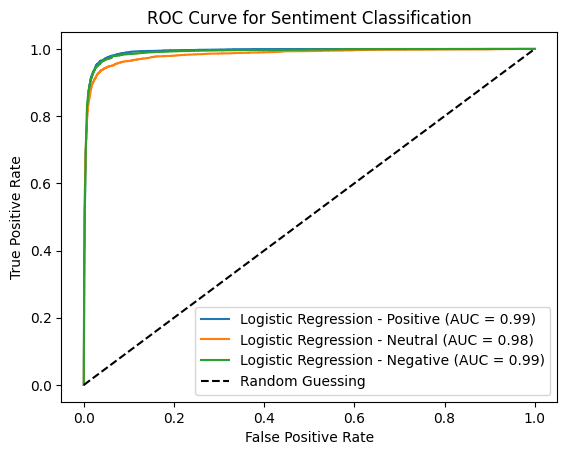

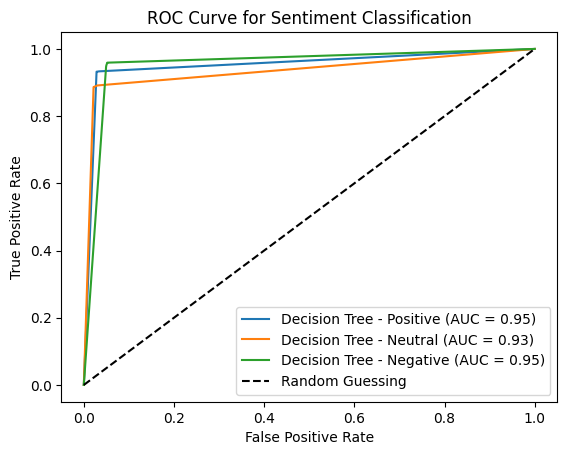

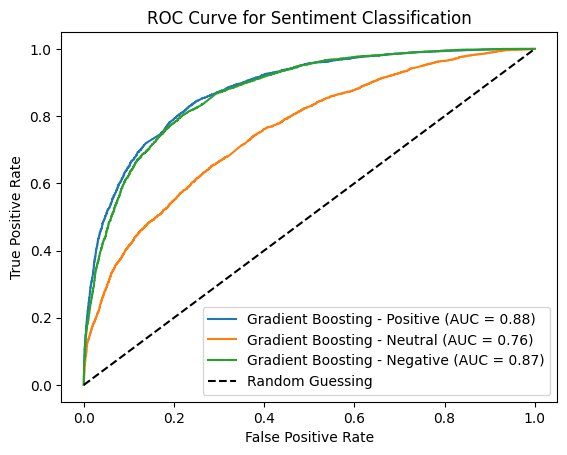

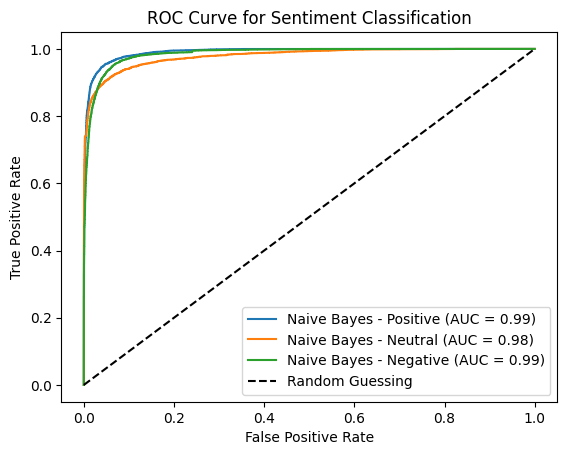

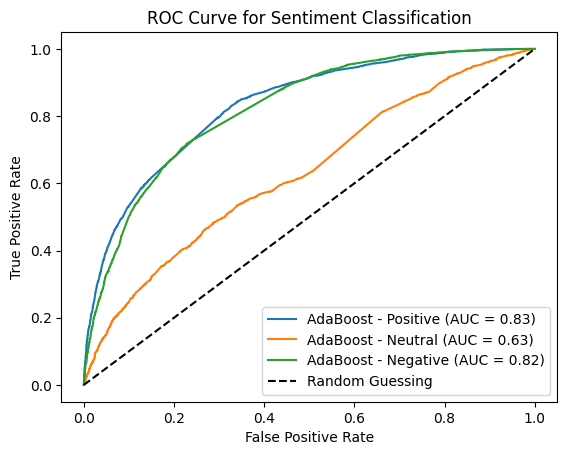

In [ ]:
for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_score = clf.predict_proba(X_test_tfidf)
    for i in range(len(categories)):
        fpr, tpr, _ = roc_curve((y_test_encoded == i), y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} - {categories[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Sentiment Classification')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb_model = MultinomialNB(alpha=1)

nb_model.fit(X_train_tfidf, y_train)

y_pred_test =nb_model.predict(X_test_tfidf)
y_pred_train =nb_model.predict(X_train_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Testing Accuracy: {train_accuracy:.2f}")
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")



Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.94      0.88      0.91      6819
     Neutral       1.00      0.28      0.44      4326
    Positive       0.77      1.00      0.87     11819

    accuracy                           0.83     22964
   macro avg       0.90      0.72      0.74     22964
weighted avg       0.86      0.83      0.80     22964

Testing Accuracy: 0.88
Testing Accuracy: 0.83


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


nb_model = MultinomialNB(alpha=2)

nb_model.fit(X_train_tfidf, y_train)

y_pred_test =nb_model.predict(X_test_tfidf)
y_pred_train =nb_model.predict(X_train_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Testing Accuracy: {train_accuracy:.2f}")
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.94      0.70      0.80      6819
     Neutral       1.00      0.05      0.10      4326
    Positive       0.67      1.00      0.80     11819

    accuracy                           0.73     22964
   macro avg       0.87      0.58      0.56     22964
weighted avg       0.81      0.73      0.67     22964

Testing Accuracy: 0.76
Testing Accuracy: 0.73


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


nb_model = MultinomialNB(alpha=0.7)

nb_model.fit(X_train_tfidf, y_train)

y_pred_test =nb_model.predict(X_test_tfidf)
y_pred_train =nb_model.predict(X_train_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Testing Accuracy: {train_accuracy:.2f}")
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.95      0.93      0.94      6819
     Neutral       1.00      0.52      0.68      4326
    Positive       0.84      1.00      0.91     11819

    accuracy                           0.89     22964
   macro avg       0.93      0.81      0.84     22964
weighted avg       0.90      0.89      0.88     22964

Testing Accuracy: 0.94
Testing Accuracy: 0.89


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_model = MultinomialNB(alpha=0.6)
nb_model.fit(X_train_tfidf, y_train)
y_pred_test =nb_model.predict(X_test_tfidf)
y_pred_train =nb_model.predict(X_train_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Testing Accuracy: {train_accuracy:.2f}")
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.95      0.94      0.95      6819
     Neutral       1.00      0.61      0.76      4326
    Positive       0.87      1.00      0.93     11819

    accuracy                           0.91     22964
   macro avg       0.94      0.85      0.88     22964
weighted avg       0.92      0.91      0.90     22964

Testing Accuracy: 0.95
Testing Accuracy: 0.91


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


nb_model = MultinomialNB(alpha=10)

nb_model.fit(X_train_tfidf, y_train)

y_pred_test =nb_model.predict(X_test_tfidf)
y_pred_train =nb_model.predict(X_train_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Testing Accuracy: {train_accuracy:.2f}")
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Classification Report (Test Set):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.95      0.13      0.23      6819
     Neutral       0.00      0.00      0.00      4326
    Positive       0.54      1.00      0.70     11819

    accuracy                           0.55     22964
   macro avg       0.50      0.38      0.31     22964
weighted avg       0.56      0.55      0.43     22964

Testing Accuracy: 0.56
Testing Accuracy: 0.55


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier

logistic_model = LogisticRegression(C=10)

ovr_classifier = OneVsRestClassifier(logistic_model)

ovr_classifier.fit(X_train_tfidf, y_train)

y_pred = ovr_classifier.predict(X_test_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

y_pred_train = ovr_classifier.predict(X_train_tfidf)

print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.99      0.99      0.99      6819
     Neutral       0.99      0.95      0.97      4326
    Positive       0.98      1.00      0.99     11819

    accuracy                           0.99     22964
   macro avg       0.99      0.98      0.98     22964
weighted avg       0.99      0.99      0.99     22964

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     27676
     Neutral       1.00      0.99      1.00     17359
    Positive       1.00      1.00      1.00     46821

    accuracy                           1.00     91856
   macro avg       1.00      1.00      1.00     91856
weighted avg       1.00      1.00      1.00     91856

Training Accuracy: 1.00
Testing Accuracy: 0.99


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier

logistic_model = LogisticRegression(C=0.1, max_iter=100)

ovr_classifier = OneVsRestClassifier(logistic_model)

ovr_classifier.fit(X_train_tfidf, y_train)

y_pred = ovr_classifier.predict(X_test_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

y_pred_train = ovr_classifier.predict(X_train_tfidf)

print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78      6819
     Neutral       0.86      0.09      0.16      4326
    Positive       0.72      0.97      0.83     11819

    accuracy                           0.74     22964
   macro avg       0.79      0.61      0.59     22964
weighted avg       0.77      0.74      0.69     22964

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       0.80      0.79      0.80     27676
     Neutral       0.90      0.09      0.17     17359
    Positive       0.73      0.98      0.84     46821

    accuracy                           0.76     91856
   macro avg       0.81      0.62      0.60     91856
weighted avg       0.78      0.76      0.70     91856

Training Accuracy: 0.76
Testing Accuracy: 0.74


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier

logistic_model = LogisticRegression(C=1, max_iter=100)

ovr_classifier = OneVsRestClassifier(logistic_model)

ovr_classifier.fit(X_train_tfidf, y_train)

y_pred = ovr_classifier.predict(X_test_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

y_pred_train = ovr_classifier.predict(X_train_tfidf)

print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.91      0.95      0.93      6819
     Neutral       0.96      0.66      0.78      4326
    Positive       0.90      0.98      0.94     11819

    accuracy                           0.91     22964
   macro avg       0.92      0.86      0.88     22964
weighted avg       0.91      0.91      0.91     22964

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       0.96      0.97      0.97     27676
     Neutral       0.99      0.82      0.90     17359
    Positive       0.94      0.99      0.97     46821

    accuracy                           0.95     91856
   macro avg       0.96      0.93      0.94     91856
weighted avg       0.96      0.95      0.95     91856

Training Accuracy: 0.95
Testing Accuracy: 0.91


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier

logistic_model = LogisticRegression(C=1, max_iter=150)

ovr_classifier = OneVsRestClassifier(logistic_model)

ovr_classifier.fit(X_train_tfidf, y_train)

y_pred = ovr_classifier.predict(X_test_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

y_pred_train = ovr_classifier.predict(X_train_tfidf)

print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.92      0.95      0.93      6819
     Neutral       0.96      0.68      0.80      4326
    Positive       0.91      0.98      0.94     11819

    accuracy                           0.92     22964
   macro avg       0.93      0.87      0.89     22964
weighted avg       0.92      0.92      0.91     22964

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       0.96      0.98      0.97     27676
     Neutral       0.99      0.83      0.90     17359
    Positive       0.94      0.99      0.97     46821

    accuracy                           0.96     91856
   macro avg       0.96      0.93      0.95     91856
weighted avg       0.96      0.96      0.96     91856

Training Accuracy: 0.96
Testing Accuracy: 0.92


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier

logistic_model = LogisticRegression(C=1, max_iter=70)

ovr_classifier = OneVsRestClassifier(logistic_model)

ovr_classifier.fit(X_train_tfidf, y_train)

y_pred = ovr_classifier.predict(X_test_tfidf)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

y_pred_train = ovr_classifier.predict(X_train_tfidf)

print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classification Report (Test Set):
              precision    recall  f1-score   support

    Negative       0.91      0.95      0.93      6819
     Neutral       0.96      0.68      0.80      4326
    Positive       0.90      0.98      0.94     11819

    accuracy                           0.91     22964
   macro avg       0.93      0.87      0.89     22964
weighted avg       0.92      0.91      0.91     22964

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       0.96      0.97      0.97     27676
     Neutral       0.99      0.83      0.90     17359
    Positive       0.95      0.99      0.97     46821

    accuracy                           0.96     91856
   macro avg       0.96      0.93      0.95     91856
weighted avg       0.96      0.96      0.96     91856

Training Accuracy: 0.96
Testing Accuracy: 0.91


In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.6 MB/s eta 0:00:00
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier

logistic_model = LogisticRegression(C=1, max_iter=150)

ovr_classifier = OneVsRestClassifier(logistic_model)

ovr_classifier.fit(X_train_tfidf, y_train)

y_pred = ovr_classifier.predict(X_test_tfidf)

print("Classification Report (validation set):")
print(classification_report(y_test, y_pred))

y_pred_train = ovr_classifier.predict(X_train_tfidf)

print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"validation Accuracy: {test_accuracy:.2f}")
model_file = "ovr_classifier_model_final.pkl"

with open(model_file, 'wb') as file:
    pickle.dump(ovr_classifier, file)

print(f"Model saved to {model_file}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report (validation set):
              precision    recall  f1-score   support

    Negative       0.92      0.95      0.93      6819
     Neutral       0.96      0.68      0.80      4326
    Positive       0.91      0.98      0.94     11819

    accuracy                           0.92     22964
   macro avg       0.93      0.87      0.89     22964
weighted avg       0.92      0.92      0.91     22964

Classification Report (Training Set):
              precision    recall  f1-score   support

    Negative       0.96      0.98      0.97     27676
     Neutral       0.99      0.83      0.90     17359
    Positive       0.94      0.99      0.97     46821

    accuracy                           0.96     91856
   macro avg       0.96      0.93      0.95     91856
weighted avg       0.96      0.96      0.96     91856

Training Accuracy: 0.96
validation Accuracy: 0.92
Model saved to ovr_classifier_model_final.pkl


In [ ]:
import pandas as pd
data1=pd.read_excel("/content/clean_test.xlsx")

In [ ]:
data1.drop('Unnamed: 0',axis=1,inplace=True)
data1['Review'] = data1['Review'].astype(str)

In [ ]:
data1.head(10)

,Product Name,Review,Rating,Sentiment
0,"dove body love, supple bounce body lotion, 400...",dry skin sensitive specially winter becomes wo...,4,Positive
1,re' equil oxybenzone and omc free sunscreen fo...,sunscreens make skin feel even oily one equil ...,5,Positive
2,"mamaearth rice water conditioner 250ml, frizzy",mamaearth rice water conditioner one best cond...,5,Positive
3,h&c herbal ingredients expert natural indigo (...,really great product cover grey hair also leav...,5,Positive
4,mamaearth vitamin c body wash with vitamin c &...,body wash made natural ingredients helps one s...,5,Positive
5,kanpeki labs milkina crème facial wash | reduc...,facewash works well skin feels hydrated soft,5,Positive
6,"vaseline intensive care, deep moisture nourish...",vaseline intensive care deep moisture nourishi...,5,Positive
7,"minimalist 2% salicylic acid serum for acne, b...",effective serum see results days must follow c...,5,Positive
8,dabur vatika health shampoo - 640ml | with 7 n...,made herbal items like amla shikai reetha good...,4,Positive
9,"vivel body wash, mint & cucumber shower creme ...",smells great also provides cooling effect owin...,5,Positive


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pickle
import pandas as pd

with open('/content/ovr_classifier_model_final.pkl', 'rb') as file:
    model = pickle.load(file)



In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    return [token.lemma_ for token in doc]

data1['tokens'] =data1['Review'].apply(lambda sentence: lemmatize_sentence(sentence))


In [ ]:
data1['tokens'].astype(str)

0       ['dry', 'skin', 'sensitive', 'specially', 'win...
1       ['sunscreen', 'make', 'skin', 'feel', 'even', ...
2       ['mamaearth', 'rice', 'water', 'conditioner', ...
3       ['really', 'great', 'product', 'cover', 'grey'...
4       ['body', 'wash', 'make', 'natural', 'ingredien...
                              ...                        
1156    ['use', 'four', 'patchesyou', 'start', 'notice...
1157    ['literally', 'search', 'well', 'sunscreen', '...
1158    ['bad', 'conditionerafter', 'use', 'bid', 'amo...
1159    ['notice', 'huge', 'hype', 'minimalist', 'prod...
1160    ['you', 're', 'look', 'affordable', 'one', 'go...
Name: tokens, Length: 1161, dtype: object

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

with open('/content/tfidf_vectorizer1_final.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)



In [ ]:
data1['joined_tokens'] = [' '.join(tokens) for tokens in data1['tokens']]
new_data_tfidf = tfidf_vectorizer.transform(data1['joined_tokens']).toarray()

In [ ]:
from sklearn.metrics import accuracy_score
predictions = model.predict(new_data_tfidf)
accuracy = accuracy_score(Y,predictions)
print("Accuracy:", accuracy)


Accuracy: 0.896640826873385


In [ ]:
Y=data1['Sentiment']

In [ ]:
report = classification_report(Y, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.66      0.70        86
     Neutral       0.92      0.49      0.64       145
    Positive       0.91      0.98      0.94       930

    accuracy                           0.90      1161
   macro avg       0.86      0.71      0.76      1161
weighted avg       0.90      0.90      0.89      1161

